In [1]:
import pandas as pd
file_path = 'disney_plus_titles.csv'
disney_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
disney_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


## Time Series Analysis

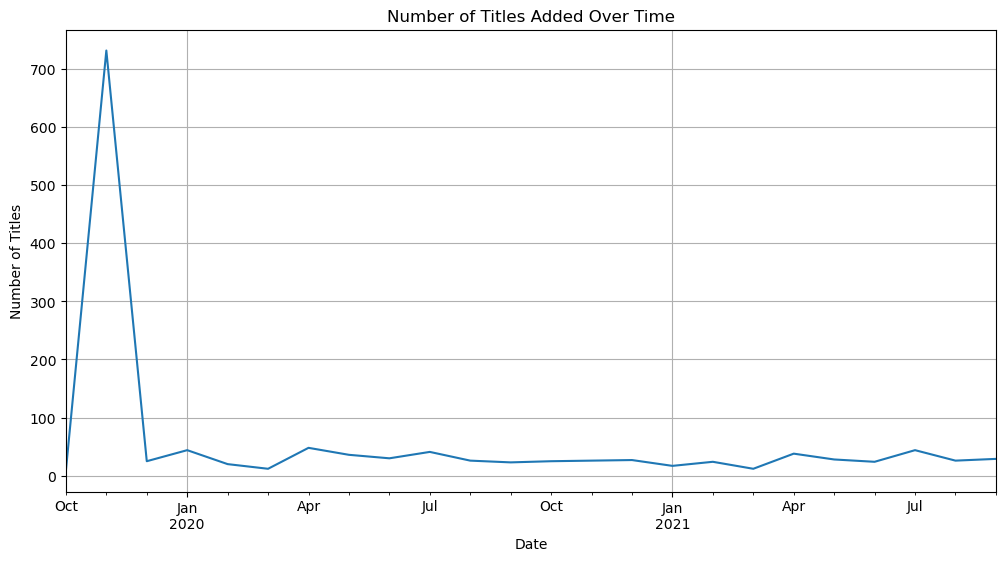

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date_added to datetime format
disney_data['date_added'] = pd.to_datetime(disney_data['date_added'])

# Extract year and month for analysis
disney_data['year_added'] = disney_data['date_added'].dt.year
disney_data['month_added'] = disney_data['date_added'].dt.to_period('M')

# Group by month and count the number of titles added
monthly_data = disney_data.groupby('month_added').size()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Number of Titles Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


## Sentiment Analysis

C:\Users\adars\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


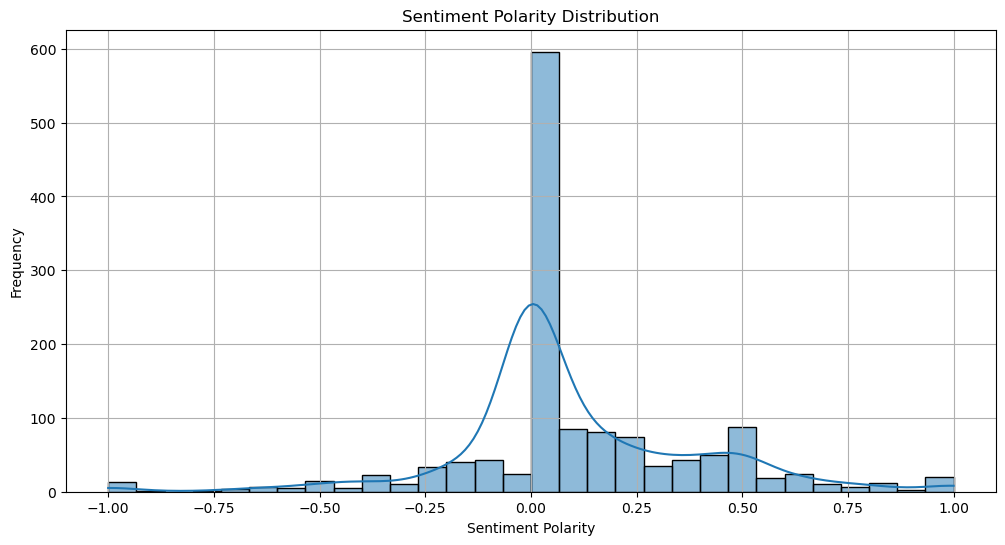

In [9]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the description column
disney_data['polarity'] = disney_data['description'].apply(get_polarity)

# Plot the sentiment polarity distribution
plt.figure(figsize=(12, 6))
sns.histplot(disney_data['polarity'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Clustering Analysis

C:\Users\adars\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


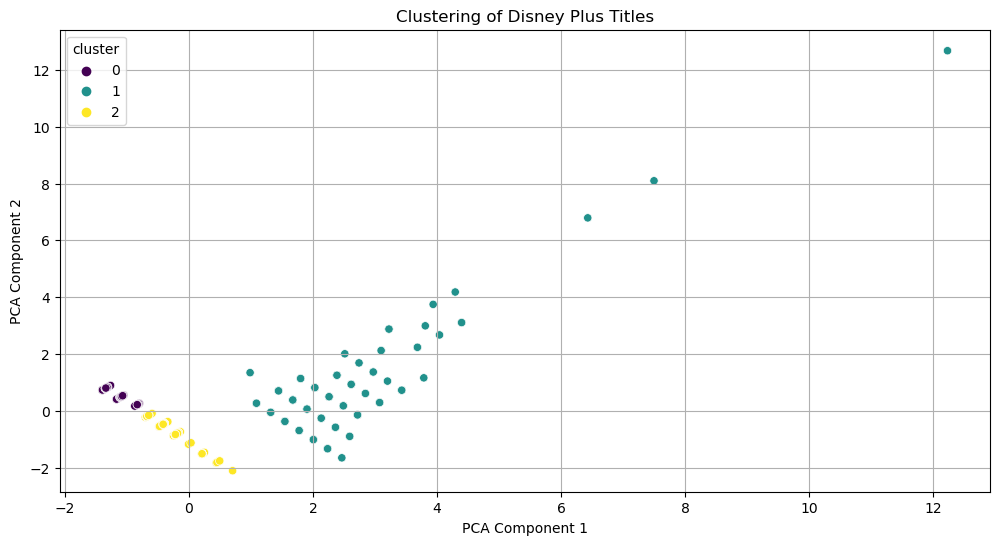

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Encode categorical features
label_encoder = LabelEncoder()
disney_data['rating_encoded'] = label_encoder.fit_transform(disney_data['rating'].fillna('Unknown'))
disney_data['type_encoded'] = label_encoder.fit_transform(disney_data['type'])

# Handle duration: convert 'Seasons' to minutes (assuming 1 season = 10 episodes, 1 episode = 45 min)
def convert_duration(duration):
    if 'Season' in duration:
        return int(duration.split(' ')[0]) * 10 * 45
    else:
        return int(duration.split(' ')[0])

disney_data['duration_min'] = disney_data['duration'].apply(convert_duration)

# Select features for clustering
features = ['rating_encoded', 'duration_min', 'type_encoded']
X = disney_data[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)  # Explicitly setting n_init
disney_data['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=disney_data['cluster'], palette='viridis')
plt.title('Clustering of Disney Plus Titles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()
